In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
print(df.shape)

(69301, 13)


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.drop('id',axis=1,inplace=True)


#Duplicates Removel 
df.drop_duplicates(inplace = True)

In [7]:
df.shape

(69277, 12)

In [8]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


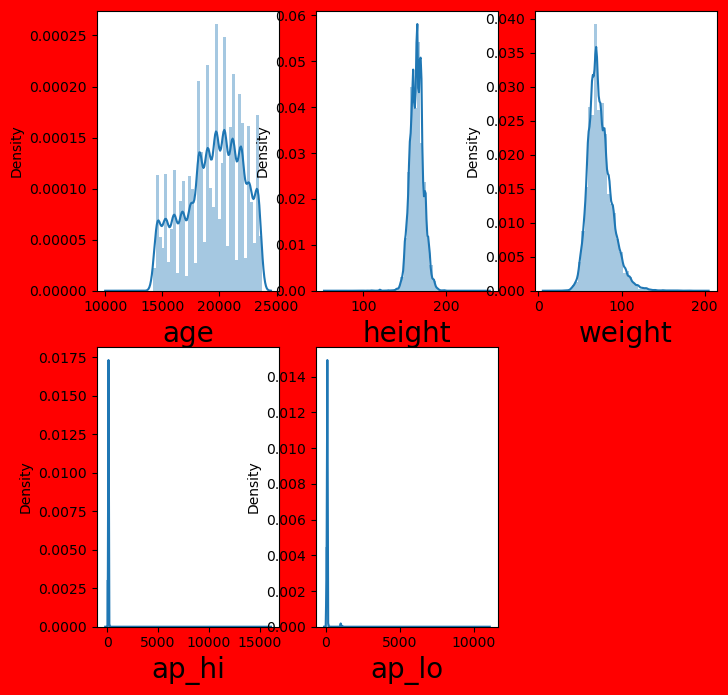

In [10]:
plt.figure(figsize=(8,8),facecolor='red')
plotnumber=1
for column in df[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber <=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [11]:
#Z Distribution/Statistics

In [12]:
#zscore=(x_mean)/std=>you have seen  this is Standard Scaler 

#Z=(x-mean)/std
from scipy.stats import zscore


z_score=zscore(df[['age','height','ap_hi','weight','ap_lo']])
abs_z_score=np.abs(z_score)#apply the formula and you get the scaled data 
filtering_entry=(abs_z_score < 3).all(axis=1)
df=df[filtering_entry]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


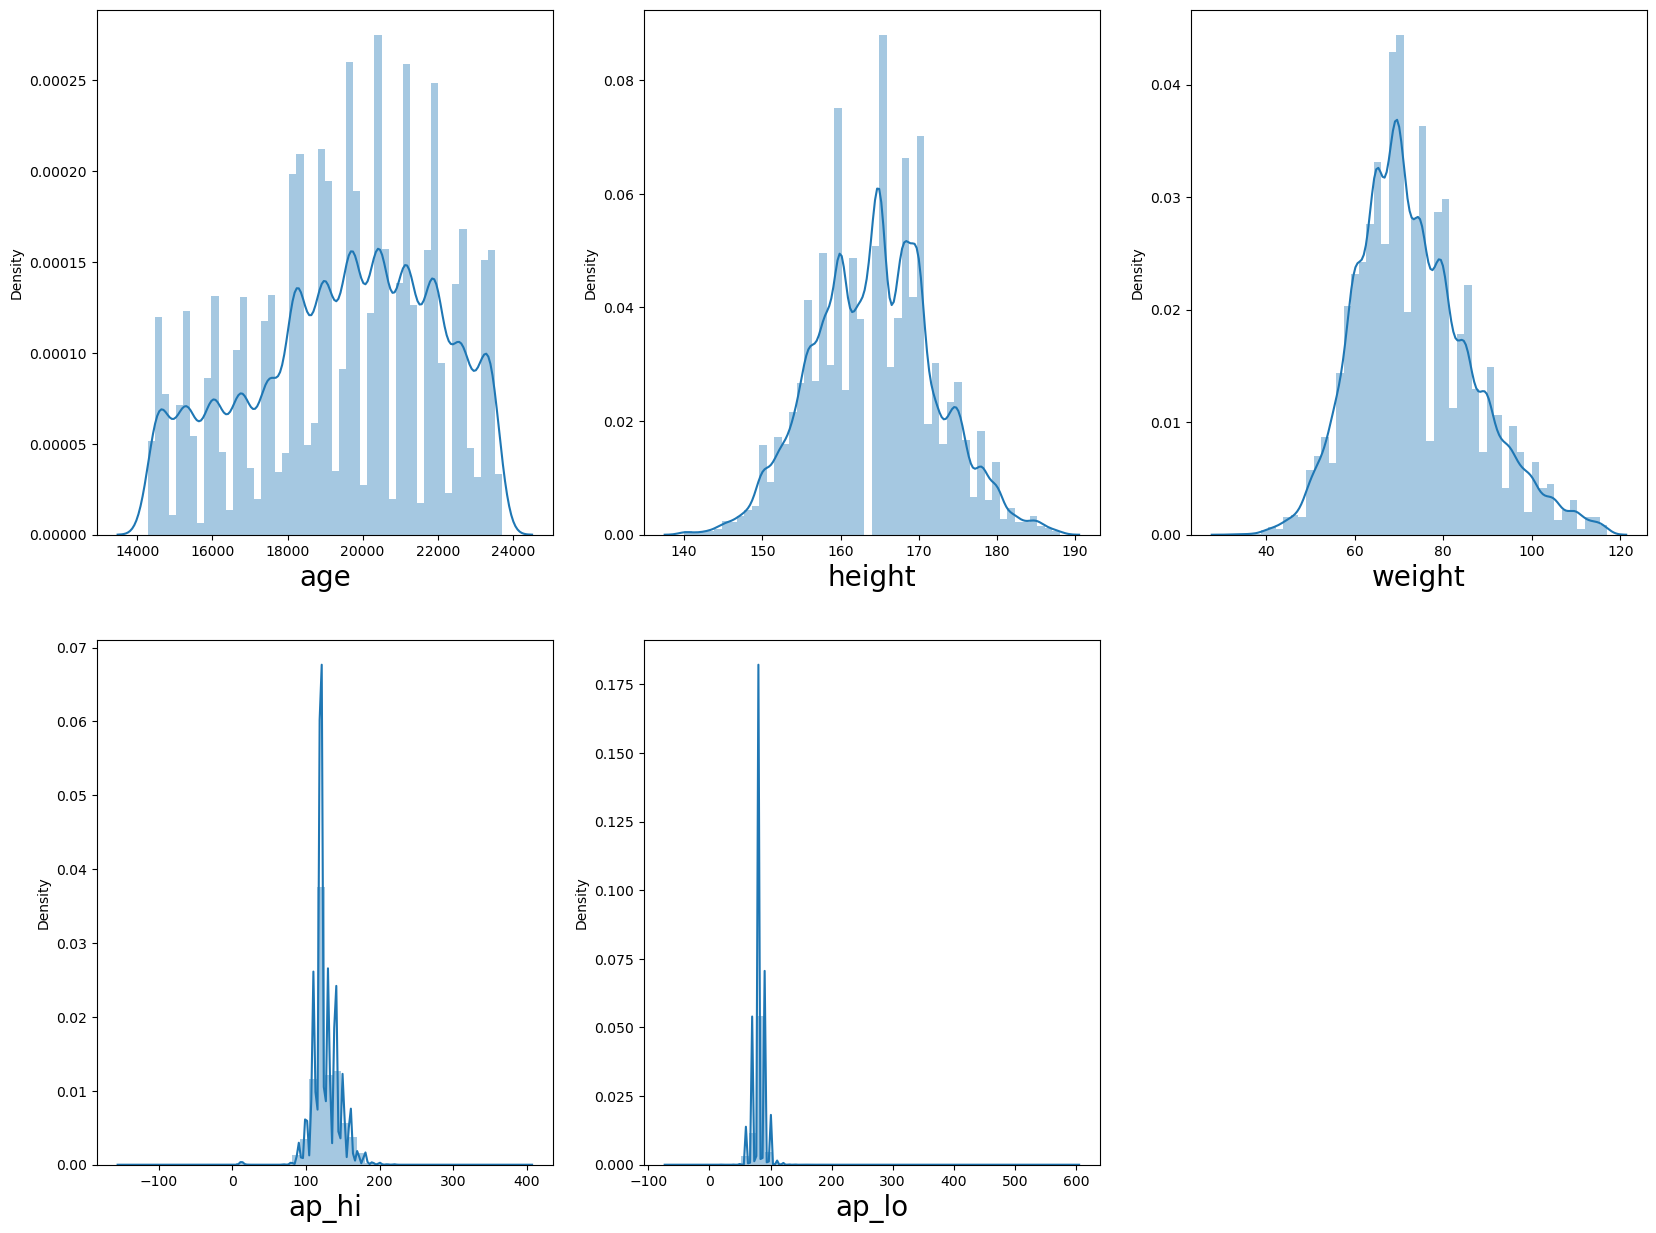

In [15]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [16]:
x=df.drop(columns=['cardio'])
y=df.cardio

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=94255)

In [18]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("=================Training Score===============")
        print("Accuracy Score ==> ",accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=cnn.predict(x_test)
        print("=================Testing Score===============")
        print("Accuracy Score ==> ",accuracy_score(y_test,pred)*100)
        print("Classification Report==> ", classification_report(y_test,pred))

In [19]:
random_clf =RandomForestClassifier()

In [20]:
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=False)

=================Training Score===============
Accuracy Score ==>  99.98218527315915
=================Testing Score===============
Accuracy Score ==>  71.35985748218528
Classification Report==>                precision    recall  f1-score   support

           0       0.71      0.74      0.72      8569
           1       0.72      0.69      0.70      8271

    accuracy                           0.71     16840
   macro avg       0.71      0.71      0.71     16840
weighted avg       0.71      0.71      0.71     16840



In [26]:
params={'n_estimators':[13,15],
       'criterion':['entropy','gini'],
       'max_depth':[10,15],
       'min_samples_split':[10,13],
       'min_samples_leaf':[5,8]}

grd=GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)

print("Best_Params ==> ",grd.best_params_)

Best_Params ==>  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 13, 'n_estimators': 15}


In [23]:
random_clf=grd.best_estimator_ #reinstantiating with best params
random_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=13,
                       n_estimators=15)

In [25]:
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=False)

=================Training Score===============
Accuracy Score ==>  74.65954077593032
=================Testing Score===============
Accuracy Score ==>  73.32541567695962
Classification Report==>                precision    recall  f1-score   support

           0       0.72      0.79      0.75      8569
           1       0.76      0.68      0.71      8271

    accuracy                           0.73     16840
   macro avg       0.74      0.73      0.73     16840
weighted avg       0.74      0.73      0.73     16840

